# Pre-Processing

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('C:\PRL DAFI\PRL_2024_jantung.csv', encoding='latin1')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dishubkotabandung\AppData\Local\Temp\ipykernel_19916\1201037944.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('C:\PRL DAFI\PRL_2024_jantung.csv', encoding='latin1')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿                       113 non-null    int64  
 1   Country                   113 non-null    object 
 2   Code                      113 non-null    object 
 3   Alcohol (2019)            113 non-null    float64
 4   Coffee (2019)             113 non-null    float64
 5   Fish and Seafood (2021)   113 non-null    float64
 6   Poultry (2021)            113 non-null    float64
 7   Beef (2021)               113 non-null    float64
 8   Sheep and Goat (2021)     113 non-null    float64
 9   Pig (2021)                113 non-null    float64
 10  % Tobacco (2020)          113 non-null    float64
 11  Milk (2021)               113 non-null    float64
 12  Sugar (2020)              113 non-null    float64
 13  Salt (2023)               113 non-null    float64
 14  Vegetable 

In [4]:
data_columns = data.columns
data_columns

Index(['ï»¿', 'Country', 'Code', 'Alcohol (2019)', 'Coffee (2019)',
       'Fish and Seafood (2021)', 'Poultry (2021)', 'Beef (2021)',
       'Sheep and Goat (2021)', 'Pig (2021)', '% Tobacco (2020)',
       'Milk (2021)', 'Sugar (2020)', 'Salt (2023)', 'Vegetable (2021)',
       'Breast Cancer Inc', 'Breast Cancer Mort', 'Lung Cancer Inc',
       'Lung Cancer Mort', 'Prostat Cancer Inc', 'Prostat Cancer Mort',
       'Cervix Uteri Cancer Inc', 'Cervix Uteri Cancer Mort',
       'Heart Disease Death', 'GDP per Capita', 'Diabetes Prevalence',
       'Fertility Rate', 'HDI', 'HDI_Class', 'GDP_Class',
       'Fertility_Rate_Class', 'Sugar_Class', 'Alcohol_Class', 'Coffee_Class',
       'Fish_Seafood_Class', 'Poultry_Class', 'Beef_Class', 'Sheep_Goat_Class',
       'Pig_Class', 'Tobacco_Class', 'Milk_Class', 'Salt_Class',
       'Vegetable_Class', 'Diabetes_Class', 'Lung_ASR_Incidence_Class',
       'Lung_ASR_Mortality_Class', 'Cervix_ASR_Inc_Class',
       'Cervix_ASR_Mort_Class', 'Breast

In [18]:
data_dafi = data.drop(['ï»¿', 'HDI_Class', 'GDP_Class', 'Fertility_Rate_Class', 'Sugar_Class', 'Fish_Seafood_Class', 'Poultry_Class',
                        'Beef_Class', 'Sheep_Goat_Class','Pig_Class', 'Milk_Class', 'Salt_Class', 'Vegetable_Class', 'Diabetes_Class',
                        'Cervix_ASR_Inc_Class', 'Cervix_ASR_Mort_Class', 'Breast_ASR_Inc_Class', 'Breast_ASR _Mort_Class',
                        'Prostat_ASR_Inc_Class', 'Prostat_ASR_ Mort_Class', 'Country', 'Code', 'Heart_Dis_Class'], axis=1)

data_dafi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Coffee (2019)             113 non-null    float64
 2   Fish and Seafood (2021)   113 non-null    float64
 3   Poultry (2021)            113 non-null    float64
 4   Beef (2021)               113 non-null    float64
 5   Sheep and Goat (2021)     113 non-null    float64
 6   Pig (2021)                113 non-null    float64
 7   % Tobacco (2020)          113 non-null    float64
 8   Milk (2021)               113 non-null    float64
 9   Sugar (2020)              113 non-null    float64
 10  Salt (2023)               113 non-null    float64
 11  Vegetable (2021)          113 non-null    float64
 12  Breast Cancer Inc         113 non-null    float64
 13  Breast Cancer Mort        113 non-null    float64
 14  Lung Cance

In [20]:
# Membuat fungsi untuk mencari tahu elemen string apa saja yang terdapat pada kolom data bertipe object

def elements_of(dataset, column):
    column_name = dataset[column]
    column_list = column_name.values.tolist()
    print(set(column_list))

elements_of(data_dafi, 'Lung_ASR_Incidence_Class')
elements_of(data_dafi, 'Lung_ASR_Mortality_Class')
elements_of(data_dafi, 'Tobacco_Class')
elements_of(data_dafi, 'Alcohol_Class')
elements_of(data_dafi, 'Coffee_Class')

{'High', 'Low', 'Moderate', 'Very Low'}
{'High', 'Low', 'Moderate', 'Very Low'}
{'Middle-high', 'Low', 'High', 'Middle-low'}
{'Middle-high', 'Low', 'High', 'Middle-low'}
{'Middle-high', 'Low', 'High', 'Middle-low'}


In [21]:
cancer_encoding = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3}
consumption_encoding = {'Low': 0, 'Middle-low': 1, 'Middle-high': 2, 'High': 3}

data_encoded = data_dafi.copy()
data_encoded['Lung_ASR_Incidence_Class'] = data_encoded['Lung_ASR_Incidence_Class'].replace(cancer_encoding).astype(int)
data_encoded['Lung_ASR_Mortality_Class'] = data_encoded['Lung_ASR_Mortality_Class'].replace(cancer_encoding).astype(int)
data_encoded['Tobacco_Class'] = data_encoded['Tobacco_Class'].replace(consumption_encoding).astype(int)
data_encoded['Alcohol_Class'] = data_encoded['Alcohol_Class'].replace(consumption_encoding).astype(int)
data_encoded['Coffee_Class'] = data_encoded['Coffee_Class'].replace(consumption_encoding).astype(int)

C:\Users\dishubkotabandung\AppData\Local\Temp\ipykernel_19916\3242637024.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Lung_ASR_Incidence_Class'] = data_encoded['Lung_ASR_Incidence_Class'].replace(cancer_encoding).astype(int)
C:\Users\dishubkotabandung\AppData\Local\Temp\ipykernel_19916\3242637024.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Lung_ASR_Mortality_Class'] = data_encoded['Lung_ASR_Mortality_Class'].replace(cancer_encoding).astype(int)
C:\Users\dishubkotabandung\AppData\Local\Tem

In [22]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Coffee (2019)             113 non-null    float64
 2   Fish and Seafood (2021)   113 non-null    float64
 3   Poultry (2021)            113 non-null    float64
 4   Beef (2021)               113 non-null    float64
 5   Sheep and Goat (2021)     113 non-null    float64
 6   Pig (2021)                113 non-null    float64
 7   % Tobacco (2020)          113 non-null    float64
 8   Milk (2021)               113 non-null    float64
 9   Sugar (2020)              113 non-null    float64
 10  Salt (2023)               113 non-null    float64
 11  Vegetable (2021)          113 non-null    float64
 12  Breast Cancer Inc         113 non-null    float64
 13  Breast Cancer Mort        113 non-null    float64
 14  Lung Cance

In [23]:
data_encoded = data_encoded[data_encoded['GDP per Capita'] != '.']

data_encoded['Breast Cancer Inc'] = data_encoded['Breast Cancer Inc'].astype(float)
data_encoded['Breast Cancer Mort'] = data_encoded['Breast Cancer Mort'].astype(float)
data_encoded['GDP per Capita'] = data_encoded['GDP per Capita'].astype(float)

# Lung Cancer Incidence

In [24]:
data_lung_inc = data_encoded.drop(['Alcohol_Class', 'Coffee_Class', 'Tobacco_Class', 'Lung_ASR_Mortality_Class', 'Lung Cancer Inc'], axis=1)
data_lung_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Coffee (2019)             113 non-null    float64
 2   Fish and Seafood (2021)   113 non-null    float64
 3   Poultry (2021)            113 non-null    float64
 4   Beef (2021)               113 non-null    float64
 5   Sheep and Goat (2021)     113 non-null    float64
 6   Pig (2021)                113 non-null    float64
 7   % Tobacco (2020)          113 non-null    float64
 8   Milk (2021)               113 non-null    float64
 9   Sugar (2020)              113 non-null    float64
 10  Salt (2023)               113 non-null    float64
 11  Vegetable (2021)          113 non-null    float64
 12  Breast Cancer Inc         113 non-null    float64
 13  Breast Cancer Mort        113 non-null    float64
 14  Lung Cance

In [26]:
data_lung_inc_columns = data_lung_inc.columns

x_lung_inc = data_lung_inc[data_lung_inc_columns[~data_lung_inc_columns.isin(['Lung_ASR_Incidence_Class'])]]
y_lung_inc = data_lung_inc[['Lung_ASR_Incidence_Class']]

# Standardize the features
scaler = StandardScaler()
x_lung_inc_arr = scaler.fit_transform(x_lung_inc)

y_lung_inc_arr = y_lung_inc.values

pca = PCA(n_components=24)  # Choose the number of components
x_lung_inc_pca = pca.fit_transform(x_lung_inc_arr)

In [27]:
print(x_lung_inc.columns)

Index(['Alcohol (2019)', 'Coffee (2019)', 'Fish and Seafood (2021)',
       'Poultry (2021)', 'Beef (2021)', 'Sheep and Goat (2021)', 'Pig (2021)',
       '% Tobacco (2020)', 'Milk (2021)', 'Sugar (2020)', 'Salt (2023)',
       'Vegetable (2021)', 'Breast Cancer Inc', 'Breast Cancer Mort',
       'Lung Cancer Mort', 'Prostat Cancer Inc', 'Prostat Cancer Mort',
       'Cervix Uteri Cancer Inc', 'Cervix Uteri Cancer Mort',
       'Heart Disease Death', 'GDP per Capita', 'Diabetes Prevalence',
       'Fertility Rate', 'HDI'],
      dtype='object')


## PCA 2D

Text(0, 0.5, 'Principal Component 2')

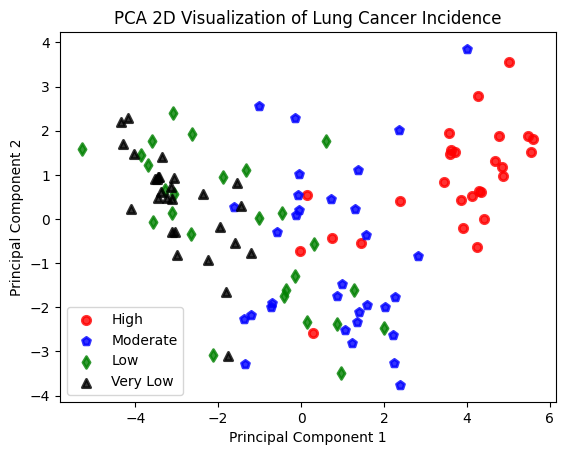

In [28]:
colors = ['red', 'blue', 'green', 'black']
target_names_inc = ['High', 'Moderate', 'Low', 'Very Low']

for color, i, target_name_inc, shape in zip(colors, [0, 1, 2, 3], target_names_inc, ['o', 'p', 'd', '^']):
    plt.scatter(x_lung_inc_pca[y_lung_inc_arr.flatten() == i, 0],
                x_lung_inc_pca[y_lung_inc_arr.flatten() == i, 1],
                color=color, alpha=.8, label=target_name_inc, lw=2, marker=shape)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Visualization of Lung Cancer Incidence')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## PCA 3D

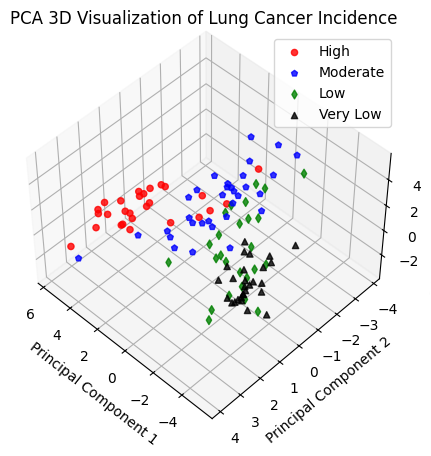

In [29]:
from mpl_toolkits.mplot3d import Axes3D

plt.ion()

fig_inc = plt.figure(1, figsize=(5, 10))
ax_inc = fig_inc.add_subplot(111, projection="3d", elev=48, azim=134)
for color, i, target_name_inc, shape in zip(colors, [0, 1, 2, 3], target_names_inc, ['o', 'p', 'd', '^']):
    mask_inc = y_lung_inc_arr == target_name_inc
    ax_inc.scatter(x_lung_inc_pca[y_lung_inc_arr.flatten() == i, 0],
               x_lung_inc_pca[y_lung_inc_arr.flatten() == i, 1],
               x_lung_inc_pca[y_lung_inc_arr.flatten() == i, 2],
               color=color, alpha=.8, label=target_name_inc, lw=1, marker=shape)
ax_inc.legend(loc='best', shadow=False, scatterpoints=1)
ax_inc.set_title('PCA 3D Visualization of Lung Cancer Incidence')
ax_inc.set_xlabel('Principal Component 1')
ax_inc.set_ylabel('Principal Component 2')
ax_inc.set_zlabel('Principal Component 3')

plt.show()

## PCA Cumulative Variance

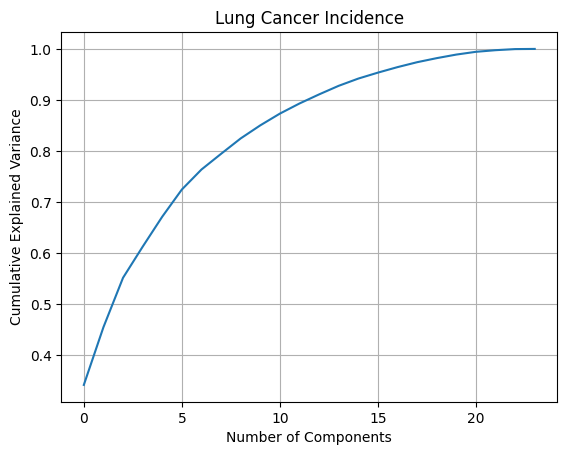

In [31]:
pca_ = PCA(n_components=24)
pca_inc = pca_.fit(x_lung_inc_arr)

cumulative_variance_lung_inc = np.cumsum(pca_inc.explained_variance_ratio_)

plt.plot(range(0,24), cumulative_variance_lung_inc)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Lung Cancer Incidence')
plt.grid(True)
plt.show()

## PCA Loadings

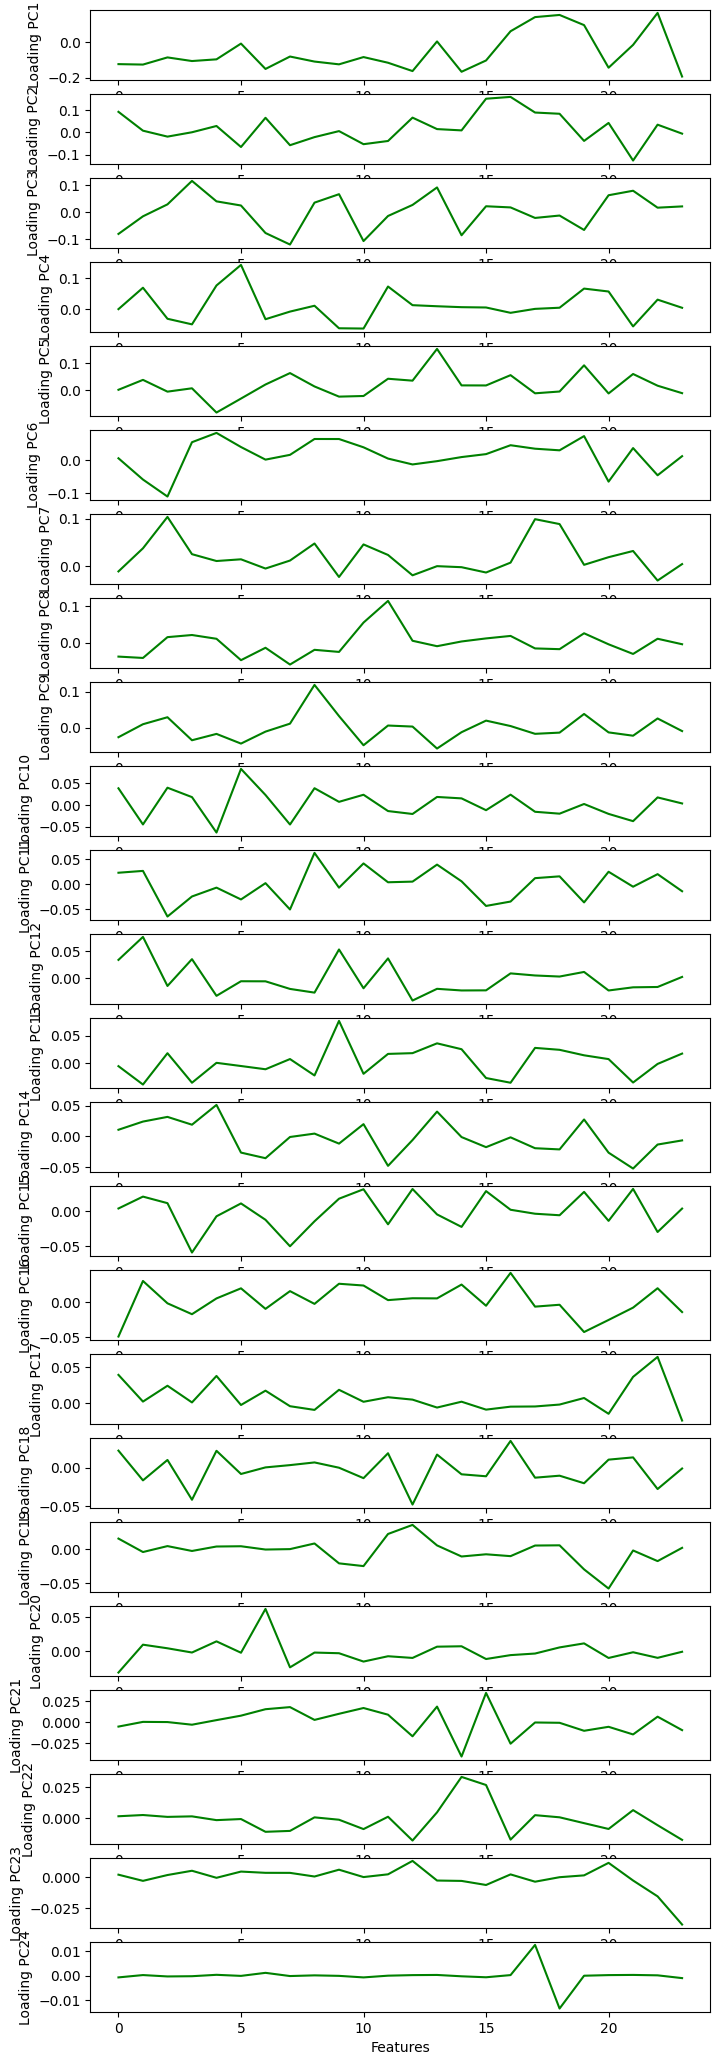

In [42]:
# """ Plot PCA loadings """
#Show loadings

loadings_inc = pca_inc.components_.T * np.sqrt(pca_inc.explained_variance_ratio_)

fig_loadings_inc, ax_loadings_inc = plt.subplots(figsize=(8, 26), nrows=24, ncols=1)
for i in range(24):
    ax_loadings_inc[i].plot(np.arange(24),loadings_inc[:,i],c='g')
    ax_loadings_inc[i].set_xlabel('Features')
    ax_loadings_inc[i].set_ylabel(f'Loading PC{i+1}')

plt.show()

## ANOVA

In [65]:
# Perform the ANOVA
f_val_lung_inc, p_val_lung_inc = f_classif(x_lung_inc, y_lung_inc)

# Print the ANOVA results
f_val_lung_inc, p_val_lung_inc = f_classif(x_lung_inc, y_lung_inc)
f_val_lung_inc_df = pd.DataFrame({'F-value': f_val_lung_inc, 'p-value': p_val_lung_inc}, index=x_lung_inc.columns)
f_val_lung_inc_df.sort_values(by='p-value')

c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,p-value
Lung Cancer Mort,198.394541,5.354048e-44
HDI,61.078591,3.032816e-23
Fertility Rate,52.412820,4.725425e-21
Pig (2021),48.146203,6.809731e-20
Alcohol (2019),33.403807,2.166832e-15
Cervix Uteri Cancer Mort,29.365506,5.410878e-14
Breast Cancer Inc,26.069859,8.655835e-13
% Tobacco (2020),22.342958,2.374724e-11
Cervix Uteri Cancer Inc,22.313686,2.439245e-11
Coffee (2019),13.759366,1.127077e-07


# Lung Cancer Mortality

In [33]:
data_lung_mor = data_encoded.drop(['Alcohol_Class', 'Coffee_Class', 'Tobacco_Class', 'Lung_ASR_Incidence_Class', 'Lung Cancer Mort'], axis=1)
data_lung_mor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Coffee (2019)             113 non-null    float64
 2   Fish and Seafood (2021)   113 non-null    float64
 3   Poultry (2021)            113 non-null    float64
 4   Beef (2021)               113 non-null    float64
 5   Sheep and Goat (2021)     113 non-null    float64
 6   Pig (2021)                113 non-null    float64
 7   % Tobacco (2020)          113 non-null    float64
 8   Milk (2021)               113 non-null    float64
 9   Sugar (2020)              113 non-null    float64
 10  Salt (2023)               113 non-null    float64
 11  Vegetable (2021)          113 non-null    float64
 12  Breast Cancer Inc         113 non-null    float64
 13  Breast Cancer Mort        113 non-null    float64
 14  Lung Cance

In [34]:
data_lung_mor_columns = data_lung_mor.columns

x_lung_mor = data_lung_mor[data_lung_mor_columns[~data_lung_mor_columns.isin(['Lung_ASR_Mortality_Class'])]]
y_lung_mor = data_lung_mor[['Lung_ASR_Mortality_Class']]

# Standardize the features
scaler = StandardScaler()
x_lung_mor_arr = scaler.fit_transform(x_lung_mor)

y_lung_mor_arr = y_lung_mor.values

pca = PCA(n_components=24)  # Choose the number of components
x_lung_mor_pca = pca.fit_transform(x_lung_mor_arr)

## PCA 2D

Text(0, 0.5, 'Principal Component 2')

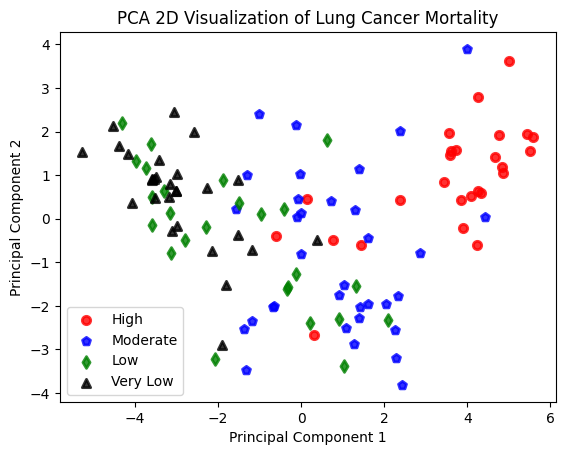

In [35]:
colors = ['red', 'blue', 'green', 'black']
target_names_mor = ['High', 'Moderate', 'Low', 'Very Low']

for color, i, target_name_mor, shape in zip(colors, [0, 1, 2, 3], target_names_mor, ['o', 'p', 'd', '^']):
    plt.scatter(x_lung_mor_pca[y_lung_mor_arr.flatten() == i, 0],
                x_lung_mor_pca[y_lung_mor_arr.flatten() == i, 1],
                color=color, alpha=.8, label=target_name_mor, lw=2, marker=shape)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Visualization of Lung Cancer Mortality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## PCA 3D

Text(0.5, 0, 'Principal Component 3')

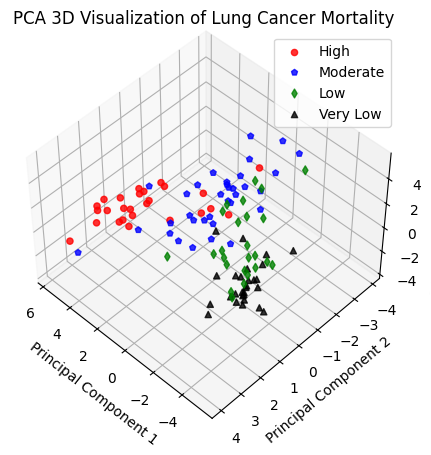

In [37]:
colors = ["red", "blue", "green", "black"]
fig_mor = plt.figure(1, figsize=(5, 10))
ax_mor = fig_mor.add_subplot(111, projection="3d", elev=48, azim=134)
for color, i, target_name_mor, shape in zip(colors, [0, 1, 2, 3], target_names_mor, ['o', 'p', 'd', '^']):
    mask_mor = y_lung_mor_arr == target_name_mor
    ax_mor.scatter(x_lung_mor_pca[y_lung_mor_arr.flatten() == i, 0],
               x_lung_mor_pca[y_lung_mor_arr.flatten() == i, 1],
               x_lung_mor_pca[y_lung_mor_arr.flatten() == i, 2],
               color=color, alpha=.8, label=target_name_mor, lw=1, marker=shape)
ax_mor.legend(loc='best', shadow=False, scatterpoints=1)
ax_mor.set_title('PCA 3D Visualization of Lung Cancer Mortality')
ax_mor.set_xlabel('Principal Component 1')
ax_mor.set_ylabel('Principal Component 2')
ax_mor.set_zlabel('Principal Component 3')

## PCA Cumulative Variance

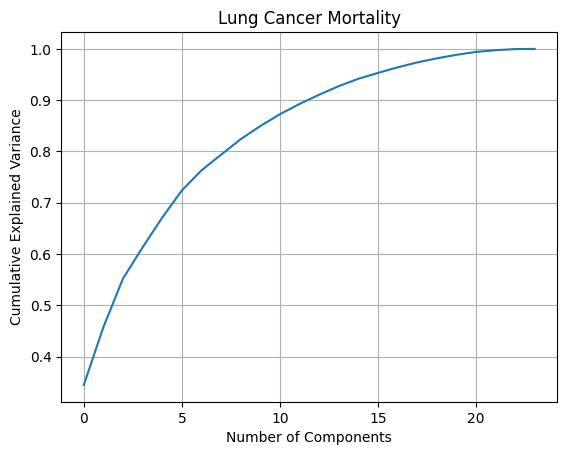

In [38]:
pca_mor = pca_.fit(x_lung_mor_arr)

cumulative_variance_lung_mor = np.cumsum(pca_mor.explained_variance_ratio_)

plt.plot(range(0,24), cumulative_variance_lung_mor)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Lung Cancer Mortality')
plt.grid(True)
plt.show()

## PCA Loadings

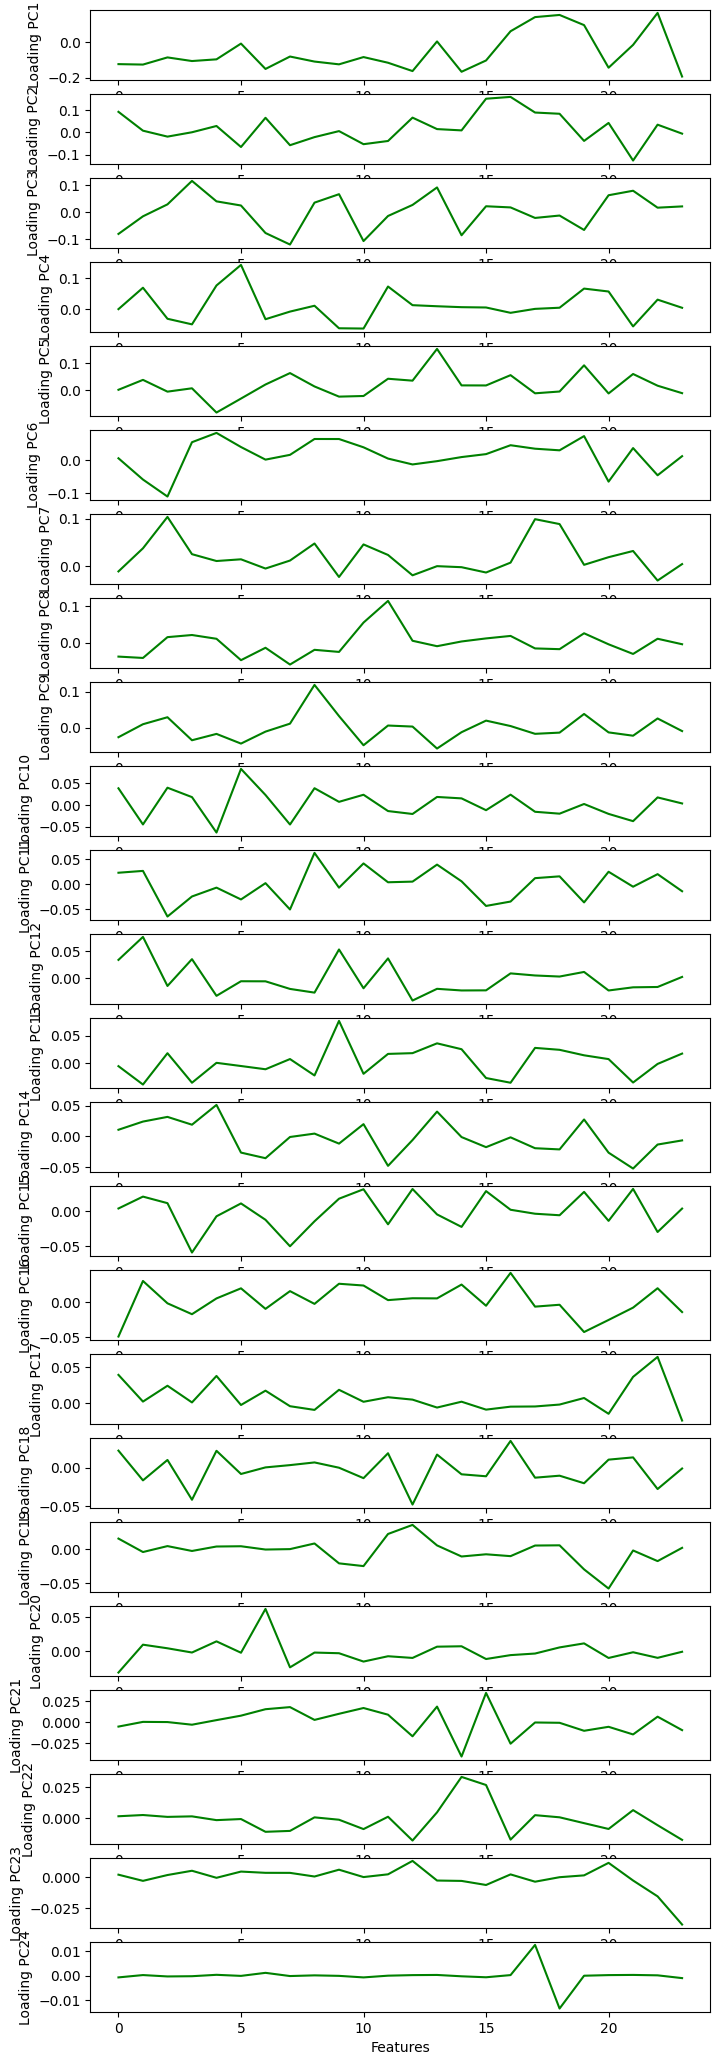

In [41]:
# """ Plot PCA loadings """
#Show loadings

loadings_mor = pca_mor.components_.T * np.sqrt(pca_mor.explained_variance_ratio_)

fig_loadings_mor, ax_loadings_mor = plt.subplots(figsize=(8, 26), nrows=24, ncols=1)
for i in range(24):
    ax_loadings_mor[i].plot(np.arange(24),loadings_mor[:,i],c='g')
    ax_loadings_mor[i].set_xlabel('Features')
    ax_loadings_mor[i].set_ylabel(f'Loading PC{i+1}')

plt.show()

## ANOVA

In [66]:
# Perform the ANOVA
f_val_lung_mor, p_val_lung_mor = f_classif(x_lung_mor, y_lung_mor)

# Print the ANOVA results
f_val_lung_mor, p_val_lung_mor = f_classif(x_lung_mor, y_lung_mor)
f_val_lung_mor_df = pd.DataFrame({'F-value': f_val_lung_mor, 'p-value': p_val_lung_mor}, index=x_lung_mor.columns)
f_val_lung_mor_df.sort_values(by='p-value')

c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,p-value
Lung Cancer Inc,273.928736,1.363071e-50
Pig (2021),61.336580,2.627692e-23
HDI,52.426674,4.685641e-21
Fertility Rate,40.086116,1.545418e-17
Alcohol (2019),37.054722,1.377439e-16
Cervix Uteri Cancer Mort,26.528612,5.835126e-13
% Tobacco (2020),25.260948,1.746971e-12
Breast Cancer Inc,24.579064,3.179817e-12
Cervix Uteri Cancer Inc,20.274624,1.630516e-10
Coffee (2019),15.103372,2.747261e-08


# Tobacco Consumption

In [43]:
data_tobacco = data_encoded.drop(['Alcohol_Class', 'Coffee_Class', 'Lung_ASR_Mortality_Class', 'Lung_ASR_Incidence_Class', '% Tobacco (2020)'], axis=1)
data_tobacco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Coffee (2019)             113 non-null    float64
 2   Fish and Seafood (2021)   113 non-null    float64
 3   Poultry (2021)            113 non-null    float64
 4   Beef (2021)               113 non-null    float64
 5   Sheep and Goat (2021)     113 non-null    float64
 6   Pig (2021)                113 non-null    float64
 7   Milk (2021)               113 non-null    float64
 8   Sugar (2020)              113 non-null    float64
 9   Salt (2023)               113 non-null    float64
 10  Vegetable (2021)          113 non-null    float64
 11  Breast Cancer Inc         113 non-null    float64
 12  Breast Cancer Mort        113 non-null    float64
 13  Lung Cancer Inc           113 non-null    float64
 14  Lung Cance

In [44]:
data_tobacco_columns = data_tobacco.columns

x_tobacco = data_tobacco[data_tobacco_columns[~data_tobacco_columns.isin(['Tobacco_Class'])]]
y_tobacco = data_tobacco[['Tobacco_Class']]

# Standardize the features
scaler = StandardScaler()
x_tobacco_arr = scaler.fit_transform(x_tobacco)

y_tobacco_arr = y_tobacco.values

pca = PCA(n_components=24)  # Choose the number of components
x_tobacco_pca = pca.fit_transform(x_tobacco_arr)

## PCA 2D

Text(0, 0.5, 'Principal Component 3')

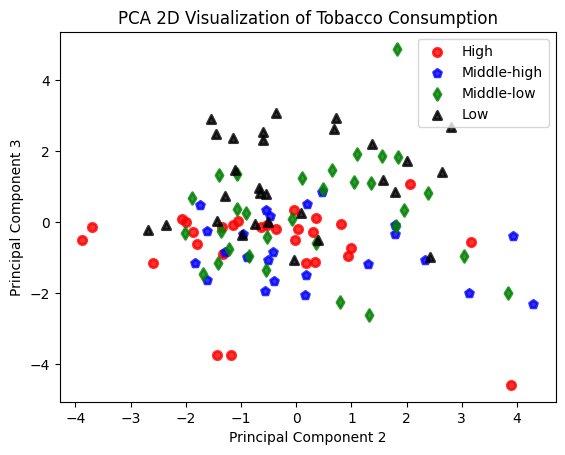

In [77]:
colors = ['red', 'blue', 'green', 'black']
target_names_tobacco = ['High', 'Middle-high', 'Middle-low', 'Low']

for color, i, target_name_tobacco, shape in zip(colors, [0, 1, 2, 3], target_names_tobacco, ['o', 'p', 'd', '^']):
    plt.scatter(x_tobacco_pca[y_tobacco_arr.flatten() == i, 1],
                x_tobacco_pca[y_tobacco_arr.flatten() == i, 2],
                color=color, alpha=.8, label=target_name_tobacco, lw=2, marker=shape)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Visualization of Tobacco Consumption')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

## PCA 3D

Text(0.5, 0, 'Principal Component 4')

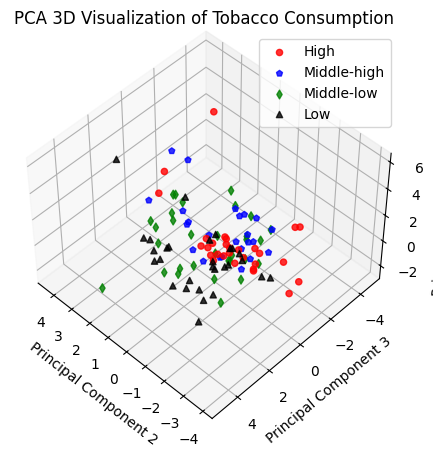

In [74]:
plt.ion()

fig_tobacco = plt.figure(1, figsize=(5, 10))
ax_tobacco = fig_tobacco.add_subplot(111, projection="3d", elev=48, azim=134)
for color, i, target_name_tobacco, shape in zip(colors, [0, 1, 2, 3], target_names_tobacco, ['o', 'p', 'd', '^']):
    mask_tobacco = y_tobacco_arr == target_name_tobacco
    ax_tobacco.scatter(x_tobacco_pca[y_tobacco_arr.flatten() == i, 1],
               x_tobacco_pca[y_tobacco_arr.flatten() == i, 2],
               x_tobacco_pca[y_tobacco_arr.flatten() == i, 3],
               color=color, alpha=.8, label=target_name_tobacco, lw=1, marker=shape)
ax_tobacco.legend(loc='best', shadow=False, scatterpoints=1)
ax_tobacco.set_title('PCA 3D Visualization of Tobacco Consumption')
ax_tobacco.set_xlabel('Principal Component 2')
ax_tobacco.set_ylabel('Principal Component 3')
ax_tobacco.set_zlabel('Principal Component 4')

## PCA Cumulative Variance

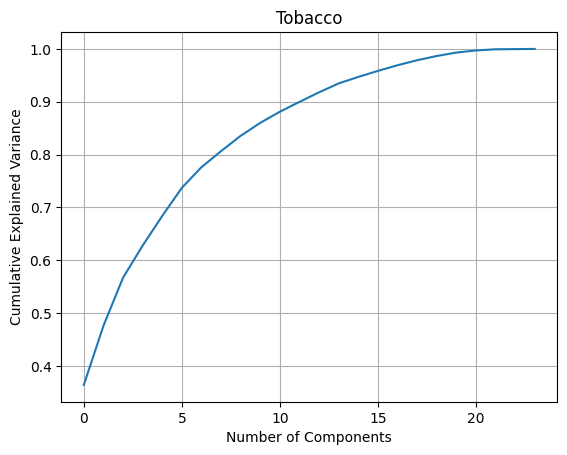

In [47]:
pca_tobacco = pca_.fit(x_tobacco_arr)

cumulative_variance_tobacco = np.cumsum(pca_tobacco.explained_variance_ratio_)

plt.plot(range(0,24), cumulative_variance_tobacco)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Tobacco')
plt.grid(True)
plt.show()

## PCA Loadings

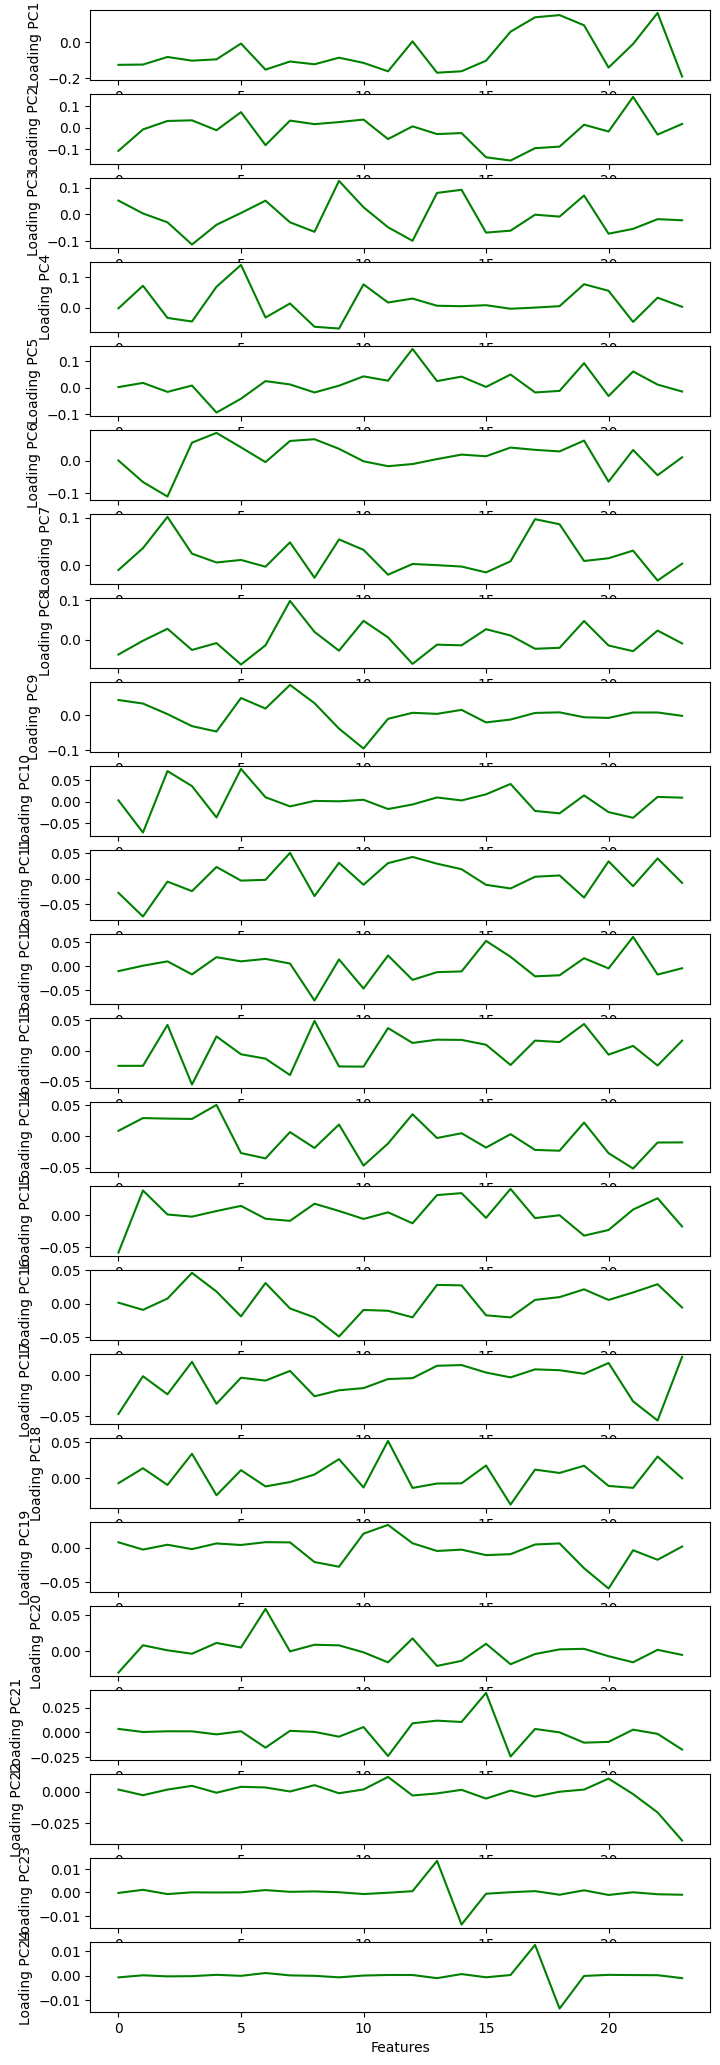

In [48]:
# """ Plot PCA loadings """
#Show loadings

loadings_tobacco = pca_tobacco.components_.T * np.sqrt(pca_tobacco.explained_variance_ratio_)

fig_loadings_tobacco, ax_loadings_tobacco = plt.subplots(figsize=(8, 26), nrows=24, ncols=1)
for i in range(24):
    ax_loadings_tobacco[i].plot(np.arange(24),loadings_tobacco[:,i],c='g')
    ax_loadings_tobacco[i].set_xlabel('Features')
    ax_loadings_tobacco[i].set_ylabel(f'Loading PC{i+1}')

## ANOVA

In [68]:
# Perform the ANOVA
f_val_tobacco, p_val_tobacco = f_classif(x_tobacco, y_tobacco)

# Print the ANOVA results
f_val_tobacco, p_val_tobacco = f_classif(x_tobacco, y_tobacco)
f_val_tobacco_df = pd.DataFrame({'F-value': f_val_tobacco, 'p-value': p_val_tobacco}, index=x_tobacco.columns)
f_val_tobacco_df.sort_values(by='p-value')

c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,p-value
Lung Cancer Mort,29.852217,3.634622e-14
Lung Cancer Inc,23.305187,9.907997e-12
Pig (2021),10.738586,3.065584e-06
Cervix Uteri Cancer Mort,10.675301,3.291825e-06
Fertility Rate,10.529612,3.879404e-06
HDI,10.409624,4.442791e-06
Cervix Uteri Cancer Inc,8.949846,2.369934e-05
Salt (2023),6.799013,3.033175e-04
Alcohol (2019),6.476679,4.481661e-04
Vegetable (2021),6.198894,6.284575e-04


# Alcohol Consumption

In [49]:
data_alcohol = data_encoded.drop(['Coffee_Class', 'Tobacco_Class', 'Lung_ASR_Mortality_Class', 'Lung_ASR_Incidence_Class', 'Alcohol (2019)'], axis=1)
data_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Coffee (2019)             113 non-null    float64
 1   Fish and Seafood (2021)   113 non-null    float64
 2   Poultry (2021)            113 non-null    float64
 3   Beef (2021)               113 non-null    float64
 4   Sheep and Goat (2021)     113 non-null    float64
 5   Pig (2021)                113 non-null    float64
 6   % Tobacco (2020)          113 non-null    float64
 7   Milk (2021)               113 non-null    float64
 8   Sugar (2020)              113 non-null    float64
 9   Salt (2023)               113 non-null    float64
 10  Vegetable (2021)          113 non-null    float64
 11  Breast Cancer Inc         113 non-null    float64
 12  Breast Cancer Mort        113 non-null    float64
 13  Lung Cancer Inc           113 non-null    float64
 14  Lung Cance

In [51]:
data_alcohol_columns = data_alcohol.columns

x_alcohol = data_alcohol[data_alcohol_columns[~data_alcohol_columns.isin(['Alcohol_Class'])]]
y_alcohol = data_alcohol[['Alcohol_Class']]

# Standardize the features
scaler = StandardScaler()
x_alcohol_arr = scaler.fit_transform(x_alcohol)

y_alcohol_arr = y_alcohol.values

pca = PCA(n_components=24)  # Choose the number of components
x_alcohol_pca = pca.fit_transform(x_alcohol_arr)

## PCA 2D

Text(0, 0.5, 'Principal Component 2')

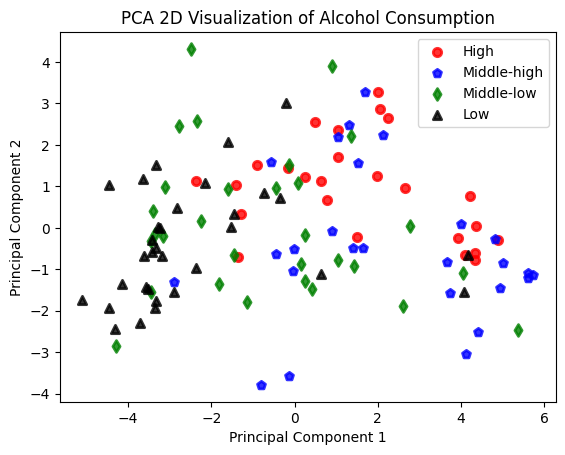

In [52]:
colors = ['red', 'blue', 'green', 'black']
target_names_alcohol = ['High', 'Middle-high', 'Middle-low', 'Low']

for color, i, target_name_alcohol, shape in zip(colors, [0, 1, 2, 3], target_names_alcohol, ['o', 'p', 'd', '^']):
    plt.scatter(x_alcohol_pca[y_alcohol_arr.flatten() == i, 0],
                x_alcohol_pca[y_alcohol_arr.flatten() == i, 1],
                color=color, alpha=.8, label=target_name_alcohol, lw=2, marker=shape)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Visualization of Alcohol Consumption')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## PCA 3D

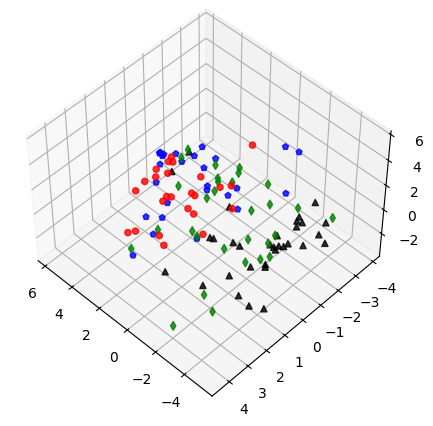

In [53]:
fig_alcohol = plt.figure(1, figsize=(5, 10))
ax_alcohol = fig_alcohol.add_subplot(111, projection="3d", elev=48, azim=134)
for color, i, target_name_alcohol, shape in zip(colors, [0, 1, 2, 3], target_names_alcohol, ['o', 'p', 'd', '^']):
    mask_alcohol = y_alcohol_arr == target_name_alcohol
    ax_alcohol.scatter(x_alcohol_pca[y_alcohol_arr.flatten() == i, 0],
                       x_alcohol_pca[y_alcohol_arr.flatten() == i, 1],
                       x_alcohol_pca[y_alcohol_arr.flatten() == i, 2],
                       color=color, alpha=.8, label=target_name_alcohol, lw=1, marker=shape)
ax_tobacco.legend(loc='best', shadow=False, scatterpoints=1)
ax_tobacco.set_title('PCA 3D Visualization of Alcohol Consumption')
ax_tobacco.set_xlabel('Principal Component 1')
ax_tobacco.set_ylabel('Principal Component 2')
ax_tobacco.set_zlabel('Principal Component 3')

plt.show()

## PCA Cumulative Variance

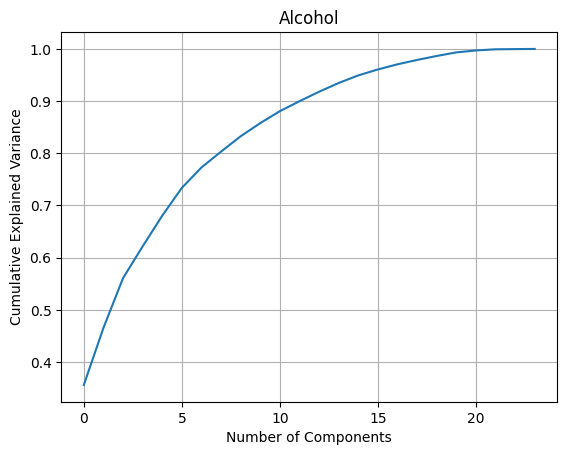

In [54]:
pca_alcohol = pca_.fit(x_alcohol_arr)

cumulative_variance_alcohol = np.cumsum(pca_alcohol.explained_variance_ratio_)

plt.plot(range(0,24), cumulative_variance_alcohol)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Alcohol')
plt.grid(True)
plt.show()

## PCA Loadings

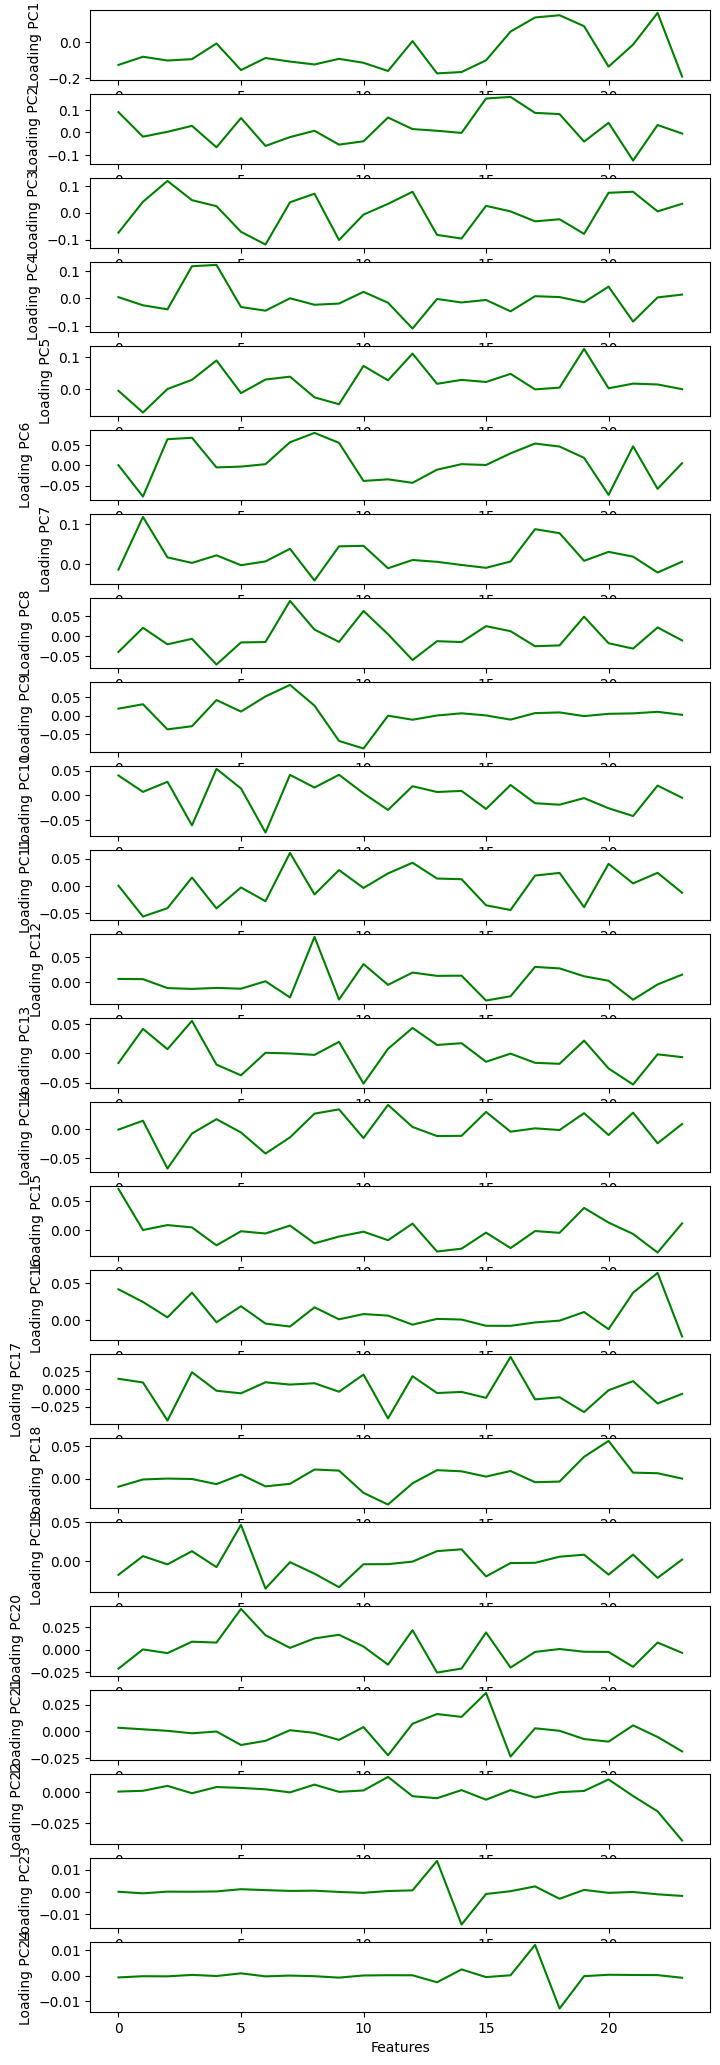

In [69]:
# """ Plot PCA loadings """
#Show loadings

loadings_alcohol = pca_alcohol.components_.T * np.sqrt(pca_alcohol.explained_variance_ratio_)

fig_loadings_alcohol, ax_loadings_alcohol = plt.subplots(figsize=(8, 26), nrows=24, ncols=1)
for i in range(24):
    ax_loadings_alcohol[i].plot(np.arange(24),loadings_alcohol[:,i],c='g')
    ax_loadings_alcohol[i].set_xlabel('Features')
    ax_loadings_alcohol[i].set_ylabel(f'Loading PC{i+1}')

## ANOVA

In [70]:
# Perform the ANOVA
f_val_alcohol, p_val_alcohol = f_classif(x_alcohol, y_alcohol)

# Print the ANOVA results
f_val_alcohol, p_val_alcohol = f_classif(x_alcohol, y_alcohol)
f_val_alcohol_df = pd.DataFrame({'F-value': f_val_alcohol, 'p-value': p_val_alcohol}, index=x_alcohol.columns)
f_val_alcohol_df.sort_values(by='p-value')

c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,p-value
Pig (2021),53.595173,2.307252e-21
Lung Cancer Inc,33.620360,1.832921e-15
Lung Cancer Mort,31.112520,1.314279e-14
Prostat Cancer Inc,19.002107,5.517893e-10
HDI,17.667386,2.040358e-09
Breast Cancer Inc,16.901462,4.381730e-09
Coffee (2019),12.187069,6.146090e-07
Fertility Rate,10.192832,5.680585e-06
Diabetes Prevalence,8.515465,3.934596e-05
GDP per Capita,8.169346,5.909920e-05


# Coffee Consumption

In [56]:
data_coffee = data_encoded.drop(['Alcohol_Class', 'Tobacco_Class', 'Lung_ASR_Mortality_Class', 'Lung_ASR_Incidence_Class', 'Coffee (2019)'], axis=1)
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol (2019)            113 non-null    float64
 1   Fish and Seafood (2021)   113 non-null    float64
 2   Poultry (2021)            113 non-null    float64
 3   Beef (2021)               113 non-null    float64
 4   Sheep and Goat (2021)     113 non-null    float64
 5   Pig (2021)                113 non-null    float64
 6   % Tobacco (2020)          113 non-null    float64
 7   Milk (2021)               113 non-null    float64
 8   Sugar (2020)              113 non-null    float64
 9   Salt (2023)               113 non-null    float64
 10  Vegetable (2021)          113 non-null    float64
 11  Breast Cancer Inc         113 non-null    float64
 12  Breast Cancer Mort        113 non-null    float64
 13  Lung Cancer Inc           113 non-null    float64
 14  Lung Cance

In [57]:
data_coffee_columns = data_coffee.columns

x_coffee = data_coffee[data_coffee_columns[~data_coffee_columns.isin(['Coffee_Class'])]]
y_coffee = data_coffee[['Coffee_Class']]

# Standardize the features
scaler = StandardScaler()
x_coffee_arr = scaler.fit_transform(x_coffee)

y_coffee_arr = y_coffee.values

pca = PCA(n_components=24)  # Choose the number of components
x_coffee_pca = pca.fit_transform(x_coffee_arr)

## PCA 2D

Text(0, 0.5, 'Principal Component 6')

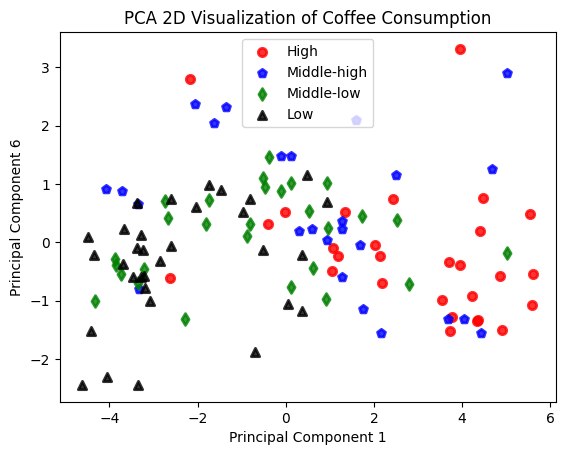

In [58]:
colors = ['red', 'blue', 'green', 'black']
target_names_coffee = ['High', 'Middle-high', 'Middle-low', 'Low']

for color, i, target_name_coffee, shape in zip(colors, [0, 1, 2, 3], target_names_coffee, ['o', 'p', 'd', '^']):
    plt.scatter(x_coffee_pca[y_coffee_arr.flatten() == i, 0],
                x_coffee_pca[y_coffee_arr.flatten() == i, 5],
                color=color, alpha=.8, label=target_name_coffee, lw=2, marker=shape)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Visualization of Coffee Consumption')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 6')

## PCA 3D

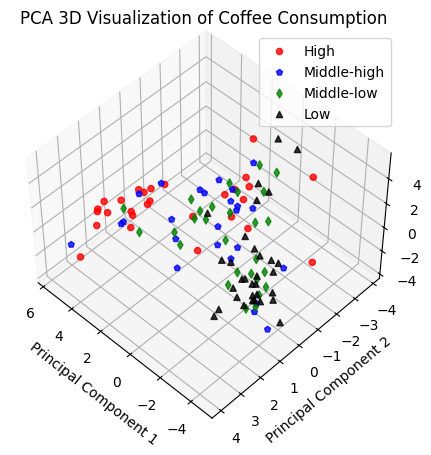

In [59]:
fig_coffee = plt.figure(1, figsize=(5, 10))
ax_coffee = fig_coffee.add_subplot(111, projection="3d", elev=48, azim=134)
for color, i, target_name_coffee, shape in zip(colors, [0, 1, 2, 3], target_names_coffee, ['o', 'p', 'd', '^']):
    mask_coffee = y_coffee_arr == target_name_coffee
    ax_coffee.scatter(x_coffee_pca[y_coffee_arr.flatten() == i, 0],
                       x_coffee_pca[y_coffee_arr.flatten() == i, 1],
                       x_coffee_pca[y_coffee_arr.flatten() == i, 2],
                       color=color, alpha=.8, label=target_name_coffee, lw=1, marker=shape)
ax_coffee.legend(loc='best', shadow=False, scatterpoints=1)
ax_coffee.set_title('PCA 3D Visualization of Coffee Consumption')
ax_coffee.set_xlabel('Principal Component 1')
ax_coffee.set_ylabel('Principal Component 2')
ax_coffee.set_zlabel('Principal Component 3')

plt.show()

## PCA Cumulative  Variance

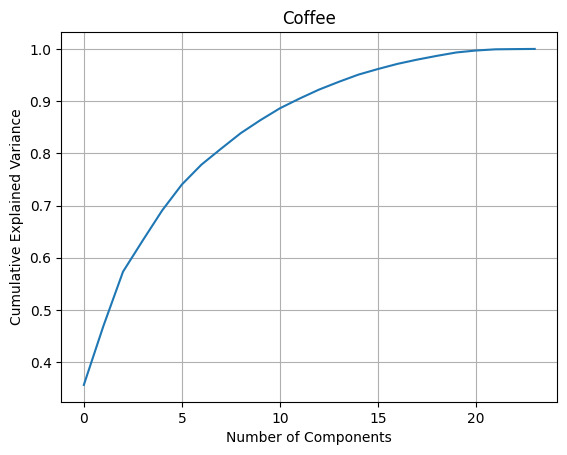

In [60]:
pca_coffee = pca_.fit(x_coffee_arr)

cumulative_variance_coffee = np.cumsum(pca_coffee.explained_variance_ratio_)

plt.plot(range(0,24), cumulative_variance_coffee)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Coffee')
plt.grid(True)
plt.show()

## PCA Loadings

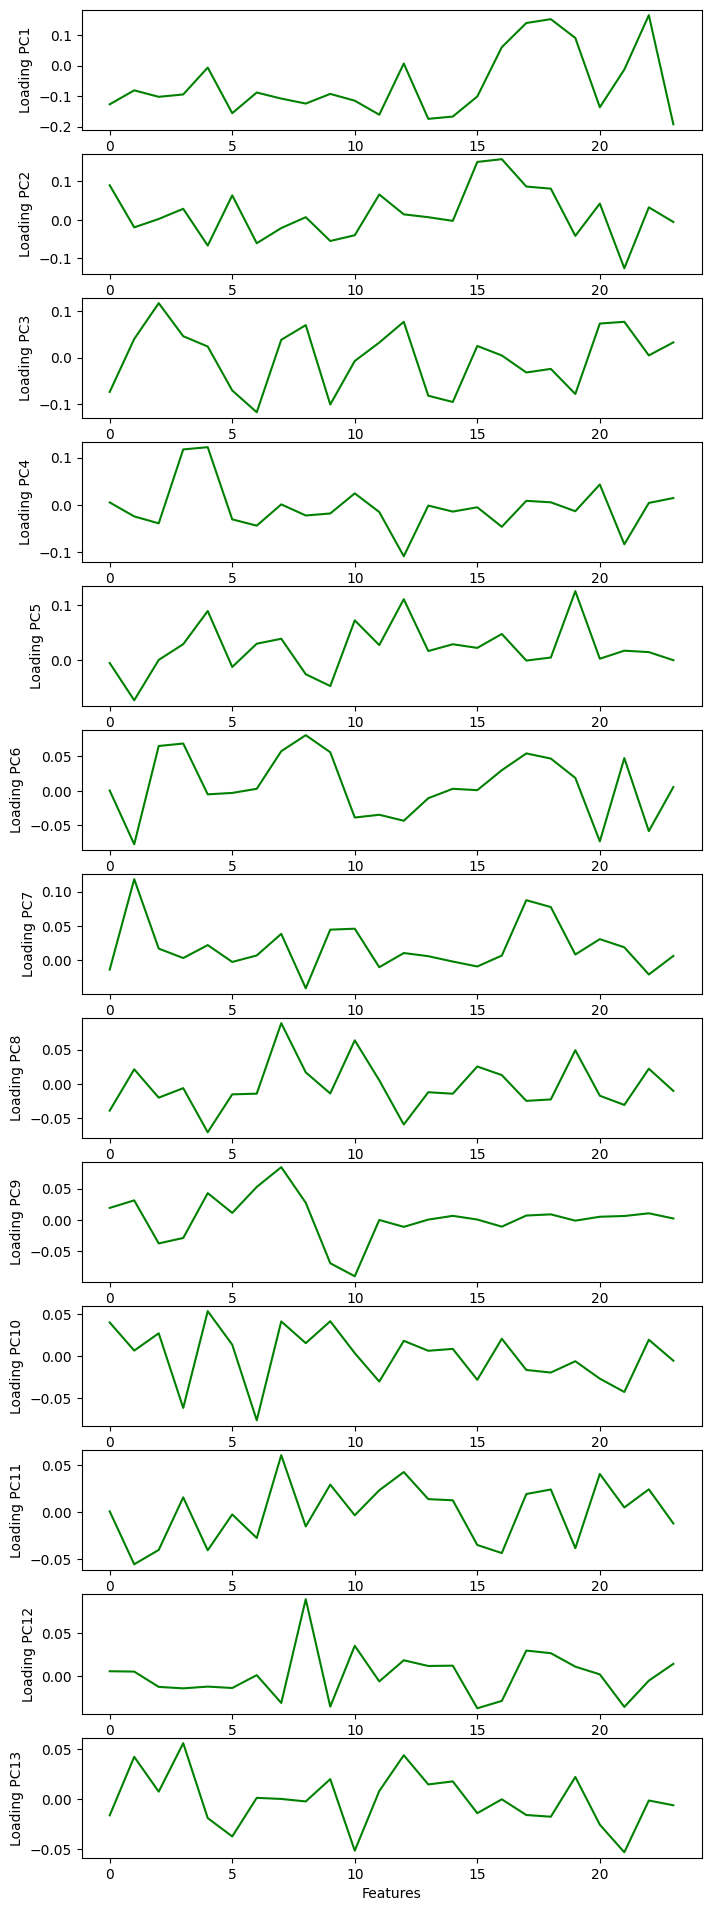

In [61]:
# """ Plot PCA loadings """
#Show loadings

loadings_coffee = pca_coffee.components_.T * np.sqrt(pca_coffee.explained_variance_ratio_)

fig_loadings_coffee, ax_loadings_coffee = plt.subplots(figsize=(8, 24), nrows=13, ncols=1)
for i in range(13):
    ax_loadings_coffee[i].plot(np.arange(24),loadings_coffee[:,i],c='g')
    ax_loadings_coffee[i].set_xlabel('Features')
    ax_loadings_coffee[i].set_ylabel(f'Loading PC{i+1}')

## ANOVA

In [71]:
# Perform the ANOVA
f_val_coffee, p_val_coffee = f_classif(x_coffee, y_coffee)

# Print the ANOVA results
f_val_coffee, p_val_coffee = f_classif(x_coffee, y_coffee)
f_val_coffee_df = pd.DataFrame({'F-value': f_val_coffee, 'p-value': p_val_coffee}, index=x_coffee.columns)
f_val_coffee_df.sort_values(by='p-value')

c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dishubkotabandung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,p-value
HDI,31.550760,9.267468e-15
Breast Cancer Inc,18.417676,9.746168e-10
Lung Cancer Mort,17.238746,3.125504e-09
Lung Cancer Inc,17.139223,3.452422e-09
GDP per Capita,16.698858,5.372846e-09
Fertility Rate,16.651041,5.638342e-09
Poultry (2021),11.545327,1.245906e-06
Alcohol (2019),10.854348,2.691792e-06
Pig (2021),10.852058,2.698718e-06
Cervix Uteri Cancer Mort,10.364194,4.677219e-06
